In [123]:
#%pip install networkx

##Методы для работы с графами:
 - nx.Graph(): Создает пустой граф.
 - G.add_node(node): Добавляет одну вершину в граф.
 - G.add_nodes_from(nodes): Добавляет несколько вершин в граф.
 - G.add_edge(u, v): Добавляет ребро между вершинами u и v.
 - G.add_edges_from(edges): Добавляет несколько ребер в граф.
 - G.nodes(): Возвращает список всех вершин в графе.
 - G.edges(): Возвращает список всех ребер в графе.
 - G.degree(node): Возвращает степень вершины (количество ребер, соединенных с вершиной).
 - G.number_of_nodes(): Возвращает количество вершин в графе.
 - G.number_of_edges(): Возвращает количество ребер в графе.
 - G.neighbors(node): Возвращает список вершин, соединенных с данной вершиной.
 - G.adjacency(): Возвращает словарь, где ключи - вершины, а значения - списки вершин, соединенных с ключом.
 - G.subgraph(nodes): Возвращает подграф, содержащий только указанные вершины.
 - G.copy(): Возвращает копию графа.
##Методы для работы с вершинами:
 - G.nodes(data=True): Возвращает список вершин с данными.
 - G.nodes.data(): Возвращает итератор, который генерирует пары (узел, данные).
 - G.nodes.get(node): Возвращает данные вершины.
 - G.nodes.set(node, **attr): Устанавливает данные вершины.
 - G.nodes.remove(node): Удаляет вершину из графа.
##Методы для работы с ребрами:
 - G.edges(data=True): Возвращает список ребер с данными.
 - G.edges.data(): Возвращает итератор, который генерирует пары (ребро, данные).
 - G.edges.get(edge): Возвращает данные ребра.
 - G.edges.set(edge, **attr): Устанавливает данные ребра.
 - G.edges.remove(edge): Удаляет ребро из графа.

_____________________________________________________________________

##Список дел

число вершин - ✔

число ребер - ✔

диаметр графа - ✔

радиус графа - ✔

число компонент связности - ✔

цикломатическое число - ✔

среднее значение степеней вершин - ✔

максимальная степень вершины - ✔

минимальная степень вершины - ✔

медиана значений степеней вершин - ✔

мода степеней вершин - ✔

хроматическое число - ✔ (Требует проверки)

планарность - ✔

Для планарных графов:

число граней - ✔ (нужно протестировать)

среднее значение числа рёбер в грани - ✔

медианное значение - ✔

максимальное и минимальное значение - ✔

_____________________________________________________________________

Импорт библиотек

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import zlib
import pandas as pd
import base64

Функция для генерации графа

In [2]:
def generate_random_graph(num_nodes, edge_probability):
    """
    Генерирует случайный граф с заданным количеством узлов и вероятностью создания ребра.

    :param num_nodes: Количество узлов в графе.
    :param edge_probability: Вероятность создания ребра между двумя узлами.
    :return: Сгенерированный граф.
    """
    G = nx.Graph()
    # Добавляем узлы в граф
    G.add_nodes_from(range(num_nodes))

    # Создаем ребра с учетом вероятности
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if random.random() < edge_probability:
                G.add_edge(i, j)

    return G

In [3]:
def encode_graph(G):
    """
    Кодирует граф в строку с помощью base64 и zlib.
    
    :param G: Граф.
    :return: Кодированный граф.
    """
    return base64.b64encode(zlib.compress("\n".join(nx.generate_adjlist(G, delimiter=' ')).encode("ascii")))


def decode_graph(s):
    """
    Декодирует граф из строки закодированной с помощью base64 и zlib.
    
    :param s: Кодированный граф.
    :return: Граф.
    """

    return nx.parse_adjlist(zlib.decompress(base64.b64decode(s)).decode().split('\n'), nodetype=int)

Сохранение графа в виде графика

In [4]:
def save_graph(G, filename):
    """
    Сохраняет граф G в файл с заданным именем.

    :param G: Граф для сохранения.
    :param filename: Имя файла для сохранения графа.
    """
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True)
    plt.draw()
    plt.savefig(filename, dpi=300)
    plt.close()

Вычисление диаметра и радиуса

In [5]:
def calculate_diameter_and_radius(G):
    """
    Вычисляет диаметр и радиус графа.

    Диаметр графа определяется как максимальное расстояние между двумя вершинами графа.
    Радиус графа определяется как минимальное из максимальных расстояний от каждой вершины до всех остальных вершин.

    :param G: Граф, для которого вычисляются диаметр и радиус.
    :return: Кортеж, содержащий диаметр и радиус графа.
    """
    diameter = None
    radius = None
    if nx.is_connected(G):
      diameter = nx.diameter(G)
      radius = nx.radius(G)
    return diameter, radius

Число компонент связности

In [6]:
def number_connected_components(G):
  """
  Вычисляет число компонент связности графа G.

  :param G: Граф, для которого вычисляется число компонент связности.
  :return: Число компонент связности графа G.
  """
  return nx.number_connected_components(G)

Цикломатическое число

In [7]:
def circuit_rank(G):
    """
    Вычисляет контурный ранг (цикломатическое число) графа G, используя формулу:
    rank = E - N + C,
    где E - количество ребер, N - количество узлов, C - количество компонент связности.

    :param G: Граф, для которого вычисляется контурный ранг (цикломатическое число).
    :return: Ранг циклов графа G.
    """
    return nx.number_of_edges(G) - nx.number_of_nodes(G) + nx.number_connected_components(G)

Значение степеней вершин

In [8]:
from collections import Counter
def meaning_of_degrees(G):
    """
    Вычисляет максимальное, минимальное, среднее, медианное значение и моду степеней вершин в графе.

    Степень вершины определяется как количество ребер, соединенных с этой вершиной.

    :param G: Граф, для которого вычисляются значения.
    :return: Кортеж, содержащий максимальное, минимальное, среднее и медианное значение степеней вершин.
    """
    degrees = [val for (node, val) in G.degree()]
    max_value = max(degrees)
    min_value = min(degrees)
    mean_value = sum(degrees) / len(degrees)
    median_value = sorted(degrees)[len(degrees) // 2]
    degree_counts = Counter(degrees)
    mode_value = degree_counts.most_common(1)[0][0]

    return max_value, min_value, mean_value, median_value, mode_value

Хроматическое число

In [39]:
import itertools

def is_valid_coloring(graph, coloring):
    """
    Проверяет, является ли заданное окрашивание графа валидным.
    
    Валидное окрашивание графа — это такое окрашивание, при котором вершины, соединенные ребром, имеют разные цвета.
    
    :param graph: Граф, для которого проверяется окрашивание.
    :param coloring: Словарь, где ключи — вершины графа, а значения — цвета этих вершин.
    :return: True, если окрашивание валидное, иначе False.
    """
    for u, v in graph.edges():
        if coloring[u] == coloring[v]:
            return False
    return True

def calculate_chromatic_number(G):
    """
    Вычисляет хроматическое число графа с помощью алгоритма, который пытается окрасить граф, начиная с первой вершины.
    
    Хроматическое число графа — это минимальное количество цветов, необходимых для окраски вершин графа таким образом,
    чтобы вершины, соединенные ребром, имели разные цвета.
    
    :param G: Граф, для которого вычисляется хроматическое число.
    :return: Словарь, где ключи — вершины графа, а значения — цвета этих вершин.
    """
    coloring = {}
    for node in G.nodes():
        # Получаем множество цветов, которые уже используются у соседей текущей вершины
        adjacent_colors = {coloring.get(neighbor) for neighbor in G.neighbors(node)}
        # Находим первый цвет, который не используется у соседей, и присваиваем его текущей вершине
        coloring[node] = next(color for color in itertools.count() if color not in adjacent_colors)
    #if not is_valid_coloring(G, coloring):
        #coloring = calculate_chromatic_number(G)
    return coloring


Проверка на планарность

In [10]:
def is_planar(G):
    """
    Проверяет, является ли граф планарным.

    :param G: Граф.
    :return: True, если граф планарный, иначе False.
    """
    if G.number_of_nodes() == 0:
        return 0
    return nx.algorithms.planarity.check_planarity(G)[0]

Число граней

In [11]:
def number_faces(G):
    """
    Вычисляет количество граней в планарном графе.

    :param G: Планарный граф.
    :return: Количество граней в планарном графе.
    """
    return len(nx.cycle_basis(G)) + 1

Среднее число рёбер в грани

In [12]:
def mean_number_face_edges(G):
    """
    Вычисляет среднее количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Среднее количество ребер в грани планарного графа.
    """
    return 2 * G.number_of_edges() / number_faces(G)


Медианное число рёбер в грани

In [13]:
def median_number_face_edges(G):
    """
    Вычисляет медианное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Медианное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return np.median(face_edges)

Максимальное число рёбер в грани

In [14]:
def max_number_face_edges(G):
    """
    Вычисляет максимальное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Максимальное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return max(face_edges)

Минимальное число рёбер в грани

In [15]:
def min_number_face_edges(G):
    """
    Вычисляет минимальное количество ребер в грани планарного графа.

    :param G: Планарный граф.
    :return: Минимальное количество ребер в грани планарного графа.
    """
    face_edges = [len(face) for face in nx.cycle_basis(G)]
    sum_without_exteral_face = sum(face_edges)
    face_edges.append(2 * G.number_of_edges() - sum_without_exteral_face)
    return min(face_edges)

Немного тестов (я слишком тупой)

In [139]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,1), (4,2)])

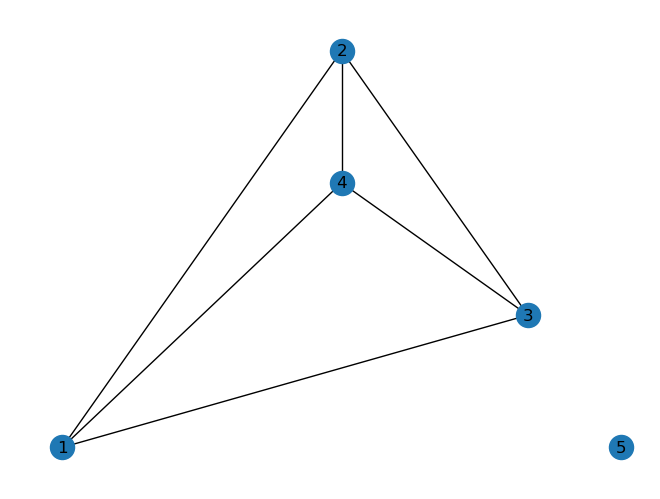

In [140]:
nx.draw_planar(G, with_labels=True)

In [141]:
P = nx.PlanarEmbedding(G)

In [142]:
save_graph(P, "test2.png")

In [143]:
list(nx.cycle_basis(G))

[[3, 4, 1], [2, 4, 1], [2, 3, 1]]

In [144]:
number_faces(G)

4

In [145]:
G.number_of_edges()

6

In [146]:
[mean_number_face_edges(G), median_number_face_edges(G), min_number_face_edges(G), max_number_face_edges(G)]

[3.0, 3.0, 3, 3]

Работа с графами

In [40]:
import pandas as pd
from tqdm import tqdm

In [45]:
labels = ["Число вершин", "Число рёбер", "Диаметр", "Радиус", "Число компонент связности", "Цикломатическое число",
          "Максимальная степень вершины", "Минимальная степень вершины", "Среднее значение степеней вершин", 
          "Медиана значений степеней вершин", "Мода значений степеней вершин", 'Хроматическое число', "Планарность",
          "Число граней", "Среднее значение числа рёбер в грани", "Медианное значение числа рёбер в грани",
          "Максимальное значение числа рёбер в грани", "Минимальное значение числа рёбер в грани"]
df = pd.DataFrame(np.nan, index=range(100000), columns=labels)

In [46]:
#Сохранение графов в файл
import base64
import zlib

In [47]:
graphs = pd.DataFrame(np.nan, index = range(100000), columns = [0])

In [ ]:
#fp = open("text.txt", "w")
plan_counter = 0
nplan_counter = 0
pd.options.mode.chained_assignment = None
for i in tqdm(range(100000)):
    num_nodes = random.randint(1, 100) # Количество узлов
    edge_probability = random.random() # Вероятность создания ребра
    G = generate_random_graph(num_nodes, edge_probability)
    plan = is_planar(G)
    if plan:
        if plan_counter == 50000:
            while plan:
                G = generate_random_graph(num_nodes, edge_probability)
                plan = is_planar(G)
            nplan_counter += 1
        else: plan_counter += 1
    else:
        if nplan_counter == 50000:
            while not plan:
                G = generate_random_graph(num_nodes, edge_probability)
                plan = is_planar(G)
            pplan_counter += 1
        else: nplan_counter += 1
#     filename = f"graph_{i}.png"
#     save_graph(G, filename)
    #print(f"Создан и сохранен граф: {filename}")
    
#     s = ""

#     s+= f"{num_nodes} {G.number_of_edges()}"
    graphs.iat[i, 0] = encode_graph(G)
    df["Число вершин"][i] = num_nodes
    df["Число рёбер"][i] = G.number_of_edges()
    
    diameter, radius = calculate_diameter_and_radius(G)
#     s += f" {diameter} {radius} "
    
    df["Диаметр"][i] = diameter
    df["Радиус"][i] = radius
    
    num_cc = number_connected_components(G)
    #s += f"{num_cc} "
    
    df["Число компонент связности"][i] = num_cc

    cyc_num = circuit_rank(G)
#     s += f"{cyc_num} "
    
    df["Цикломатическое число"][i] = cyc_num

    max_degree, min_degree, mean_degree, median_degree, mode_value = meaning_of_degrees(G)
    #print(f"Максимальная степень: {max_degree} \nМинимальная степень: {min_degree}\n"
    #      + f"Средняя степень: {mean_degree} \nМедианная степень: {median_degree}" +
    #     f"\nМода: {mode_value}")
    #s += f"{max_degree} {min_degree} {mean_degree} {median_degree} {mode_value} "

    df["Максимальная степень вершины"][i] = max_degree
    df["Минимальная степень вершины"][i] = min_degree
    df["Среднее значение степеней вершин"][i] = mean_degree
    df["Медиана значений степеней вершин"][i] = median_degree
    df["Мода значений степеней вершин"][i] = mode_value
    

    chromatic_number = len(set(calculate_chromatic_number(G).values()))
    #print(f"Хроматическое число графа: {chromatic_number}")
#     s += f"{chromatic_number} "

    df["Хроматическое число"][i] = chromatic_number

    
#     s += f"{plan}"

    df["Планарность"][i] = plan
    if plan:
        faces = number_faces(G)
#       s += f" {faces} "
        df["Число граней"][i] = faces
        
        mean_f = mean_number_face_edges(G)
        #       s += f"{mean_f} "
        df["Среднее значение числа рёбер в грани"][i] = mean_f
        
        median_f = median_number_face_edges(G)
        #       s += f"{median_f} "
        df["Медианное значение числа рёбер в грани"][i] = median_f
        
        mx_f = max_number_face_edges(G)
        #       s += f"{mx_f} "
        df["Максимальное значение числа рёбер в грани"][i] = mx_f
        
        mn_f = min_number_face_edges(G)
        #       s += f"{mn_f}"
        df["Минимальное значение числа рёбер в грани"][i] = mn_f
        
    #s += "\n"

    #fp.write(s)

#fp.close()

 58%|███████████████████████████████████████████▏                               | 57543/100000 [10:10<07:46, 91.07it/s]

In [ ]:
graphs.drop_duplicates().to_csv('data.csv', index=False, header=False)

In [ ]:
df.dropna()

In [ ]:
graphs.drop_duplicates()

Корреляция

Удалим NaN значения

In [80]:
df.drop_duplicates(inplace = True)
for col in df.columns:
    df[col].fillna(df[col].mean(), inplace=True)
df.isna().sum()

Число вершин                                 0
Число рёбер                                  0
Диаметр                                      0
Радиус                                       0
Число компонент связности                    0
Цикломатическое число                        0
Максимальная степень вершины                 0
Минимальная степень вершины                  0
Среднее значение степеней вершин             0
Медиана значений степеней вершин             0
Мода значений степеней вершин                0
Хроматическое число                          0
Планарность                                  0
Число граней                                 0
Среднее значение числа рёбер в грани         0
Медианное значение числа рёбер в грани       0
Максимальное значение числа рёбер в грани    0
Минимальное значение числа рёбер в грани     0
dtype: int64

In [94]:
df.to_csv("graph_specs.csv", encoding = "utf-8-sig")  

In [81]:
import seaborn as sb 

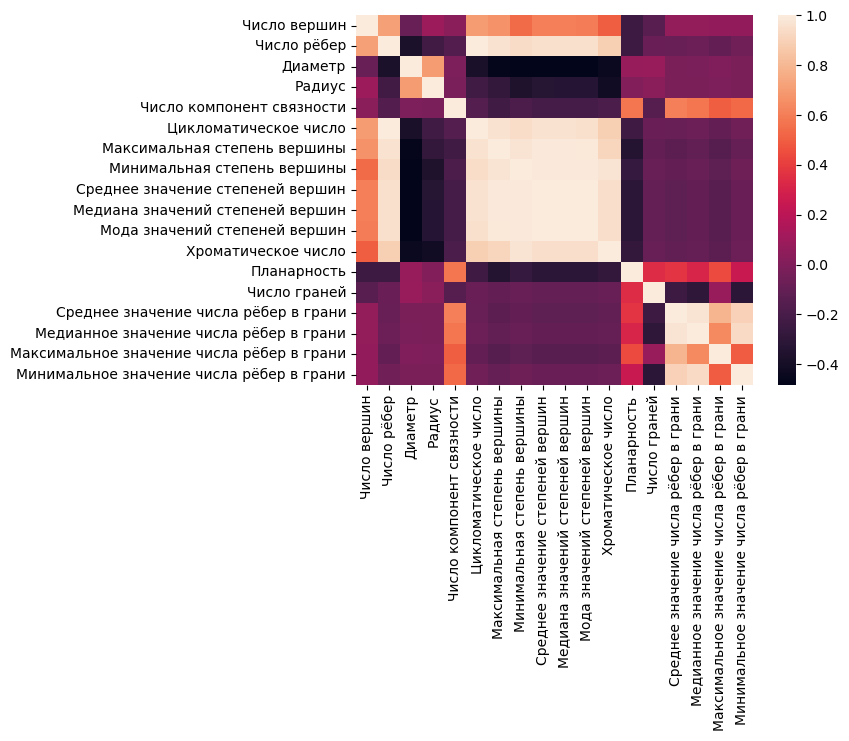

In [82]:
dataplot=sb.heatmap(df.corr()) 

In [83]:
df.corr().to_excel("output.xlsx")  

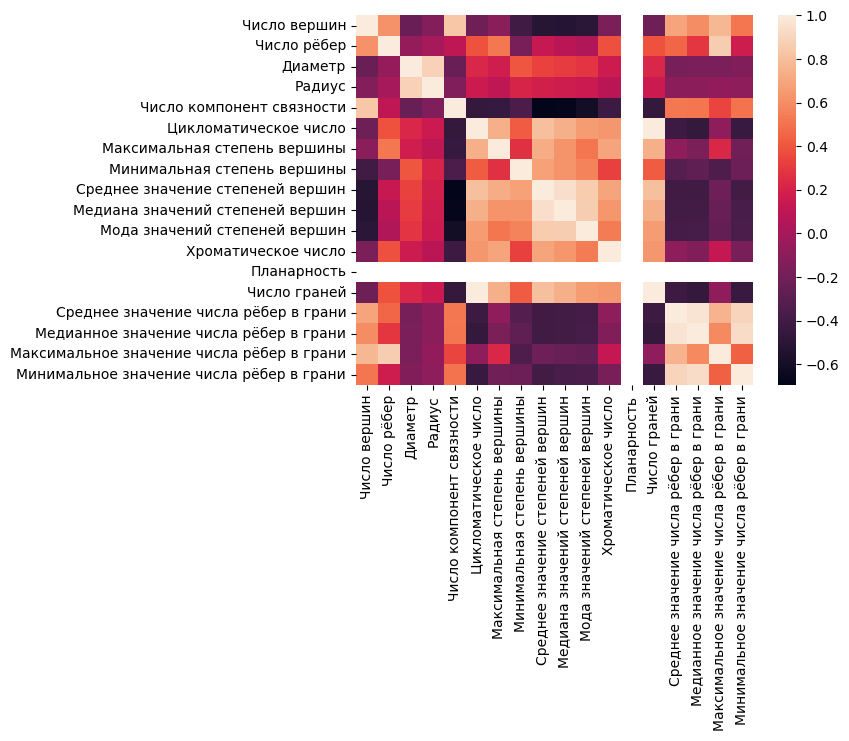

In [84]:
#Corr для планарных графов
dataplot=sb.heatmap(df[df["Планарность"] == 1].corr()) 

In [95]:
df[(df["Планарность"] == 1) & (df["Число компонент связности"] == 1)].corr().to_excel("output_plan.xlsx")  

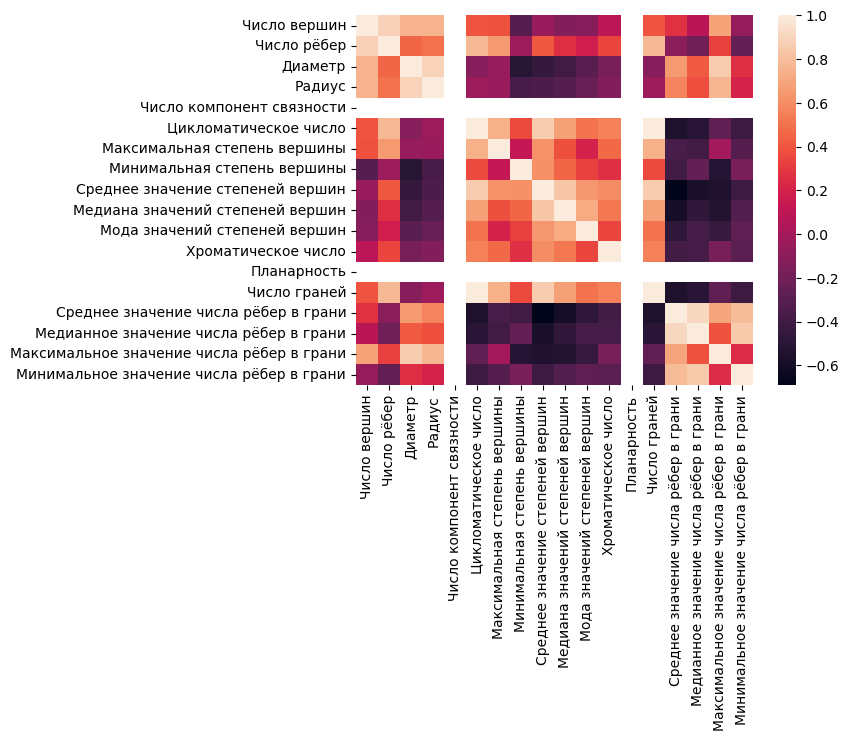

In [92]:
#Corr для планарных графов c 1 компонентой связности
dataplot=sb.heatmap(df[(df["Планарность"] == 1) & (df["Число компонент связности"] == 1)].corr()) 

Формула Эйлера

Тесты

In [ ]:
print(list(nx.generate_adjlist(G)))

In [ ]:
G = nx.Graph()
G.add_nodes_from(range(5))
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 4)
filename = f"graph_{1}.png"
save_graph(G, filename)
print(f"Создан и сохранен граф: {filename}")
degrees = [(node, val) for (node, val) in G.degree()]
print(degrees)

In [ ]:
G = nx.path_graph(5)
nx.draw_planar(G)